# Exploratory Data Analysis 
## Covid-related trials from clinicaltrials.gov

------

In [1]:
import pandas as pd
import os

# Change option so that you can see all column/rownames displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
os.chdir("/Users/oana/Documents/github/bios823_final_project/")

## Get data 

- Tried using the clinical_trials package, but it doesn't seem to work  (probably related, it hasn't been updated in a while) 
- Also tried using API; see below. Through trying out a couple requests, it seems like the API only accepts ~100 requests at a time; however, it doesn't like getting more than 2 requests. There are currently 3300 (ish) COVID-related trials, so not sure how this will work. 

For now, downloaded data from [here](https://clinicaltrials.gov/ct2/results?cond=COVID-19) with the following fields:
- Number of studies: 3370 Found Studies
- Select table columns: All available columns
- Select file format: Tab-separated values 

In [57]:
#import requests
#import time

# N.B. This doesn't work after 3 requests; so just downloaded file from
# the relevant URL. 

#study_list = [] #for saving study info (in json format)

#min_rank = 1
#for max_rank in range(100,350, 100):
#    url = "https://clinicaltrials.gov/api/query/full_studies?expr=COVID-19&min_rnk=" \
#        + str(min_rank) + "&max_rnk=" + str(max_rank) + "&fmt=json"
#   r = requests.get(url)
#    print(r.status_code)
#    study_list.append(data_dict["FullStudiesResponse"]["FullStudies"])
#    min_rank = min_rank + max_rank
#    time.sleep(10)

200
200
400


In [3]:
covid_trials_df = pd.read_csv("data/covid_studies_092020.tsv", sep="\t")

In [4]:
covid_trials_df.shape

(3370, 27)

In [5]:
covid_trials_df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

## Where are trials being held?

In [20]:
trial_locations = list(covid_trials_df["Locations"])
trial_countries = [str(i).split(",")[-1].strip() for i in trial_locations]

What countries are represented? 

In [21]:
set(trial_countries)

{'Algeria',
 'Argentina',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Brazil',
 'Burkina Faso',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czechia',
 "Côte D'Ivoire",
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Ethiopia',
 'France',
 'French Guiana',
 'Germany',
 'Gibraltar',
 'Greece',
 'Guinea',
 'Guinea-Bissau',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Islamic Republic of',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Lebanon',
 'Luxembourg',
 'Malaysia',
 'Martinique',
 'Mexico',
 'Monaco',
 'Mongolia',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'North Macedonia',
 'Norway',
 'Pakistan',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Republic of',
 'Romania',
 'Russian Federation',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Senegal',
 'Singap

How many trials are there in each country? 

In [22]:
from collections import Counter
country_count = Counter(trial_countries)

In [23]:
country_count

Counter({'United States': 671,
         'France': 438,
         'China': 132,
         'Netherlands': 23,
         'nan': 459,
         'United Kingdom': 166,
         'Islamic Republic of': 22,
         'Turkey': 93,
         'Switzerland': 47,
         'Italy': 139,
         'Spain': 137,
         'Russian Federation': 43,
         'Malaysia': 11,
         'Colombia': 17,
         'Portugal': 5,
         'Republic of': 11,
         'Puerto Rico': 4,
         'Israel': 19,
         'Pakistan': 26,
         'Mexico': 59,
         'Egypt': 126,
         'Brazil': 71,
         'Peru': 4,
         'Saudi Arabia': 20,
         'Belgium': 48,
         'Canada': 96,
         'Singapore': 18,
         'Sweden': 34,
         'Japan': 5,
         'South Africa': 9,
         'Indonesia': 7,
         'Senegal': 1,
         'Argentina': 27,
         'Germany': 64,
         'India': 31,
         'Denmark': 33,
         'Australia': 17,
         'Poland': 14,
         'Hong Kong': 17,
         'Jord

What are the top 10 countries for trials? 

In [24]:
country_count.most_common(10)

[('United States', 671),
 ('nan', 459),
 ('France', 438),
 ('United Kingdom', 166),
 ('Italy', 139),
 ('Spain', 137),
 ('China', 132),
 ('Egypt', 126),
 ('Canada', 96),
 ('Turkey', 93)]

Probably not surprisingly, it empirically seems to correspond to many of the countries with the worst covid rates as well. 

## What drugs/interventions are being studied? 

In [25]:
interventions = list(covid_trials_df["Interventions"])
#trial_countries = [str(i).split(",")[-1].strip() for i in trial_locations]

In [35]:
split_interventions = [str(i).split("|") for i in interventions]
split_interventions = sum(split_interventions, []) #unnest
split_interventions = [x for x in split_interventions if str(x) != 'nan'] # remove nans

In [37]:
intervention_count = Counter(split_interventions)
intervention_count.most_common(20)

[('Drug: Placebo', 225),
 ('Drug: Hydroxychloroquine', 100),
 ('Other: Placebo', 89),
 ('Drug: Azithromycin', 37),
 ('Biological: Placebo', 30),
 ('Drug: Tocilizumab', 29),
 ('Drug: Placebo oral tablet', 29),
 ('Other: Questionnaire', 24),
 ('Drug: Ivermectin', 21),
 ('Other: Standard of Care', 21),
 ('Drug: Remdesivir', 21),
 ('Other: No intervention', 21),
 ('Drug: Favipiravir', 19),
 ('Biological: Convalescent Plasma', 19),
 ('Biological: Convalescent plasma', 17),
 ('Drug: Placebos', 16),
 ('Other: Survey', 15),
 ('Drug: Methylprednisolone', 13),
 ('Other: Standard of care', 13),
 ('Drug: Enoxaparin', 13)]

Placebo is probably being used as a control. What's the breakdown of drugs vs biologics vs other interventions? 

In [39]:
intervention_type = [i.split(":")[0] for i in split_interventions]
intervention_type_count = Counter(intervention_type)
intervention_type_count

Counter({'Drug': 1950,
         'Procedure': 114,
         'Other': 1084,
         'Device': 222,
         'Biological': 490,
         'Diagnostic Test': 386,
         'Dietary Supplement': 104,
         'Genetic': 14,
         'Combination Product': 44,
         'Behavioral': 271,
         'Radiation': 19})

In [50]:
df = pd.DataFrame.from_dict(intervention_type_count, orient='index').reset_index()

Index(['index', 0], dtype='object')

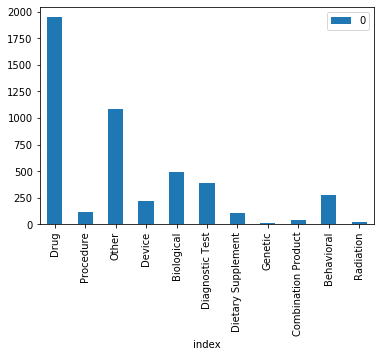

In [52]:
%matplotlib inline
df.plot.bar(x="index", y=0)

## Who is funding these studies? 

In [58]:
funder_count = Counter(list(covid_trials_df["Funded Bys"]))
funder_count_df =  pd.DataFrame.from_dict(funder_count, orient='index')

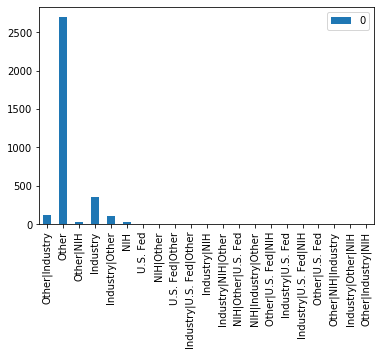

In [60]:
%matplotlib inline
funder_count_df.plot.bar()

It's hard to see the other categories without "Other". Let's remove: 

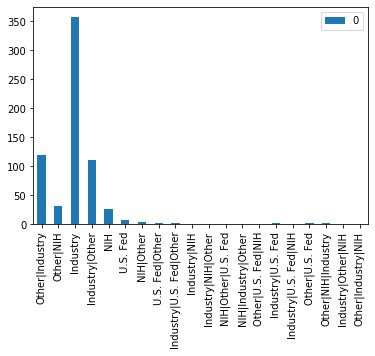

In [62]:
%matplotlib inline
funder_count_df.drop("Other", axis=0).plot.bar()